## Multiple Linear Regression using Lasso and Ridge for Housing Price Prediction
1. Reading, Understanding and Visualizing the data
2. Perform EDA
3. Preparing the data for modelling (train-test split, rescaling/reshaping etc.)
4. Training the model
5. Residual Analysis
6. Predictions and evaluation on the test set

## High level steps involved are
- Reading, Understanding and Visualizing the data
- Perform EDA
- Preparing the data for modelling (train-test split, rescaling/reshaping etc.)
- Training the model
- Residual Analysis
- Predictions and evaluation on the test set

### Step 1. Reading, Understanding and Visualizing the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import statsmodels.api as sm
import warnings

# Import RFE and LinearRegression for Model building
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# For splitting the data between train and test
from sklearn.model_selection import train_test_split

# For rescaling the features
from sklearn.preprocessing import MinMaxScaler

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# to ignore the warnings
warnings.filterwarnings('ignore')

In [2]:
# Step 1.A. Read the dataset
housing_df = pd.read_csv('train.csv')

In [3]:
housing_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing_df.shape

(1460, 81)

In [5]:
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Lets check for nulls present in the data.
housing_df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

### Even though it shows as NA values but if we look at the data dictionary they have actual meaning.
    - E.g. For PoolQC with NA value means No Pool etc.
    - So it may not be a good idea to remove coloumns with higher nulls/NAs.
    - It will be better if we impute them

In [8]:
# Lets check for % of nulls present in the data.
round(housing_df.isnull().sum()/len(housing_df.index),4).sort_values(ascending=False).head(20)

PoolQC          0.9952
MiscFeature     0.9630
Alley           0.9377
Fence           0.8075
FireplaceQu     0.4726
LotFrontage     0.1774
GarageYrBlt     0.0555
GarageCond      0.0555
GarageType      0.0555
GarageFinish    0.0555
GarageQual      0.0555
BsmtFinType2    0.0260
BsmtExposure    0.0260
BsmtQual        0.0253
BsmtCond        0.0253
BsmtFinType1    0.0253
MasVnrArea      0.0055
MasVnrType      0.0055
Electrical      0.0007
Id              0.0000
dtype: float64

In [9]:
# First lets drop Id column as it will not help in prediction.
housing_df = housing_df.drop(['Id'], axis=1)
housing_df.shape

(1460, 80)

## Imputing the coloumns

In [10]:
# Lets input the categorical values first with 'none' --> This is a string in Python and is not equal to None.
categorical_coloumn_with_na = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'BsmtQual',
                              'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 
                              'GarageFinish', 'GarageQual', 'GarageCond', 'Electrical', 'MasVnrType']

In [11]:
# A generic method to replace na with any value, default being "none" only for catagorical variables
def replace_na_none(df, columns, value='none'):
    for col in columns:
        df[col].fillna(value, inplace=True)
    return df

In [12]:
housing_df = replace_na_none(housing_df, categorical_coloumn_with_na)

In [13]:
# rechecking again now for numerical variables
round(housing_df.isnull().sum()/len(housing_df.index),4).sort_values(ascending=False).head(20)

LotFrontage     0.1774
GarageYrBlt     0.0555
MasVnrArea      0.0055
MSSubClass      0.0000
KitchenAbvGr    0.0000
GarageType      0.0000
FireplaceQu     0.0000
Fireplaces      0.0000
Functional      0.0000
TotRmsAbvGrd    0.0000
KitchenQual     0.0000
BedroomAbvGr    0.0000
GarageCars      0.0000
HalfBath        0.0000
FullBath        0.0000
BsmtHalfBath    0.0000
BsmtFullBath    0.0000
GrLivArea       0.0000
LowQualFinSF    0.0000
2ndFlrSF        0.0000
dtype: float64

In [16]:
# Now we have LotFrontage, GarageYrBlt and MasVnrArea variables which are numeric in nature. 
# So they can be imputed with meadian
numeric_columns_with_na = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

In [15]:
# A generic method to impute na with median for numeric variables
def replace_na_median(df, columns):
    for col in columns:
        df[col].fillna(df[col].median(), inplace=True)
    return df

In [17]:
housing_df = replace_na_median(housing_df, numeric_columns_with_na)

In [18]:
# rechecking again now for any na/null values
round(housing_df.isnull().sum()/len(housing_df.index),4).sort_values(ascending=False).head(20)

MSSubClass      0.0
MSZoning        0.0
GarageYrBlt     0.0
GarageType      0.0
FireplaceQu     0.0
Fireplaces      0.0
Functional      0.0
TotRmsAbvGrd    0.0
KitchenQual     0.0
KitchenAbvGr    0.0
BedroomAbvGr    0.0
HalfBath        0.0
FullBath        0.0
BsmtHalfBath    0.0
BsmtFullBath    0.0
GrLivArea       0.0
LowQualFinSF    0.0
2ndFlrSF        0.0
1stFlrSF        0.0
GarageFinish    0.0
dtype: float64

In [23]:
housing_df.shape

(1460, 80)

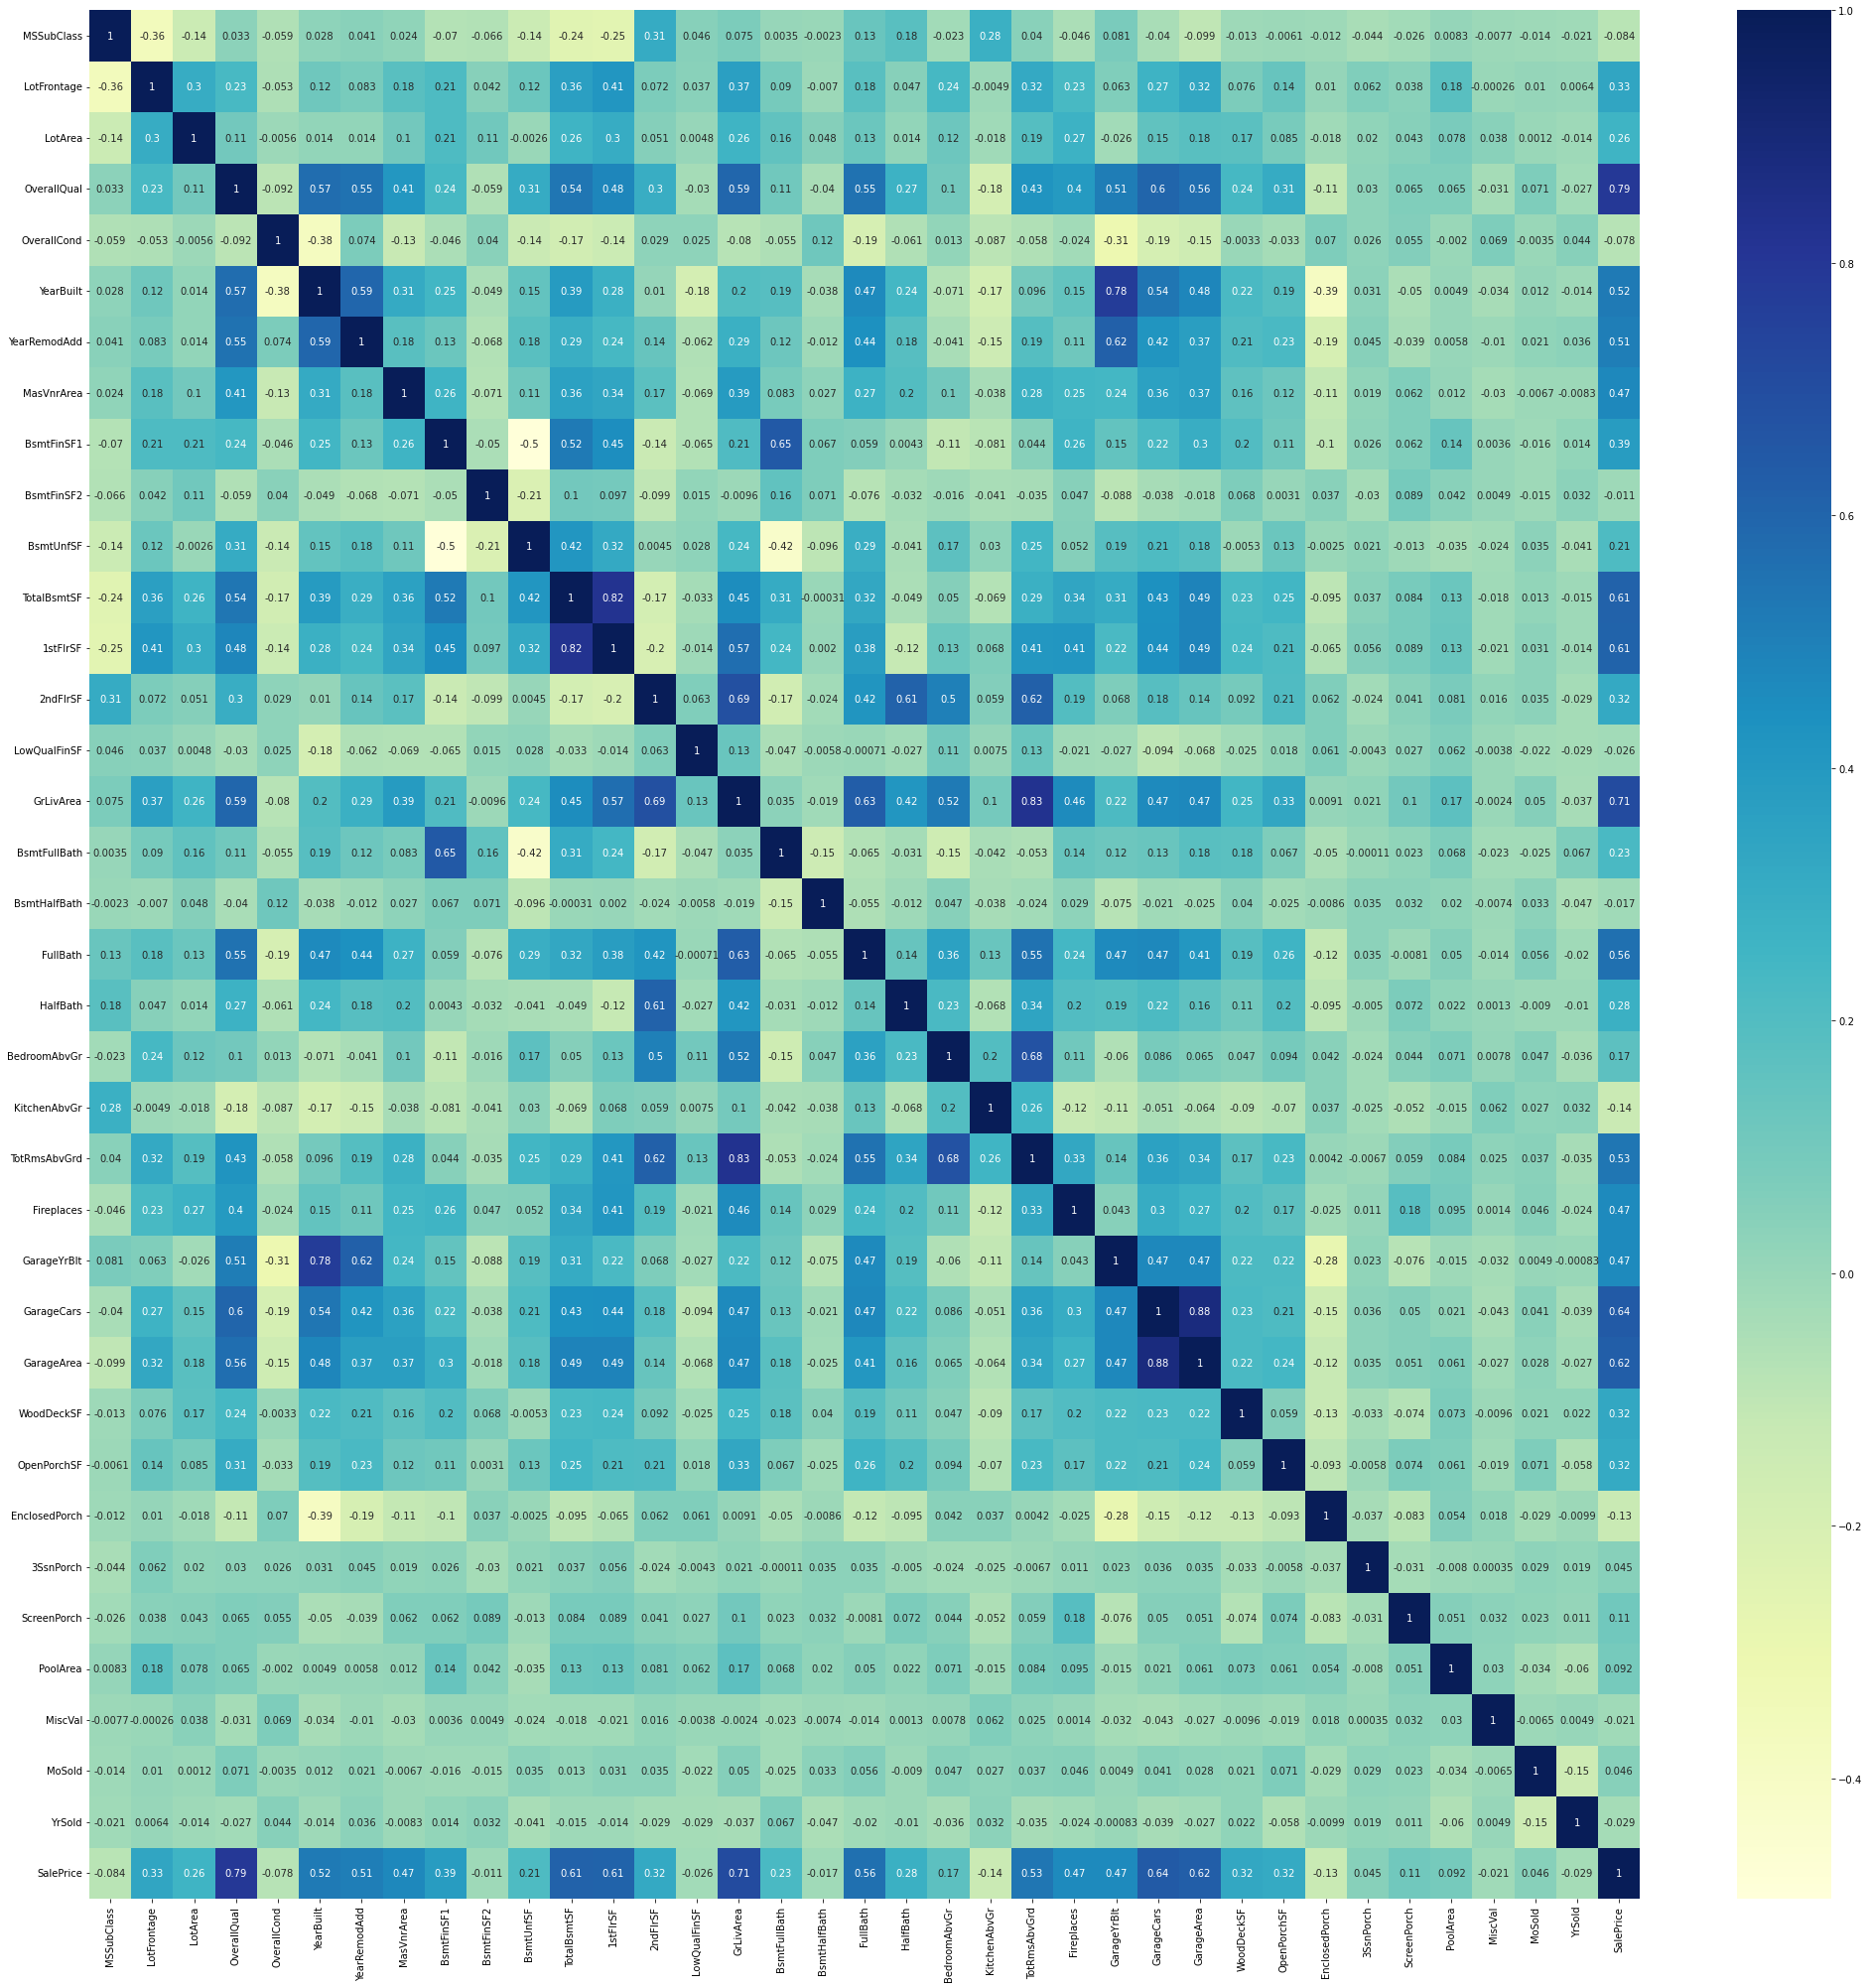

In [32]:
# Lets look at the corr heatmap for numerical variable
plt.figure(figsize=(35,35))
sns.heatmap(housing_df.select_dtypes(include=['float64', 'int64']).corr(), cmap="YlGnBu", annot=True)
plt.show()

### We can see many variables are correlated.
 - E.g. 
    - SalePrice is postively correlated with OverallQual - 0.79
    - SalePrice is postively correlated with GrLivArea - 0.71
    - YearBuilt is postively correlated with GarageYrBlt - 0.78 and so on

### As we need to predict SalePrice we should look for variables which are higly correlated with it. 

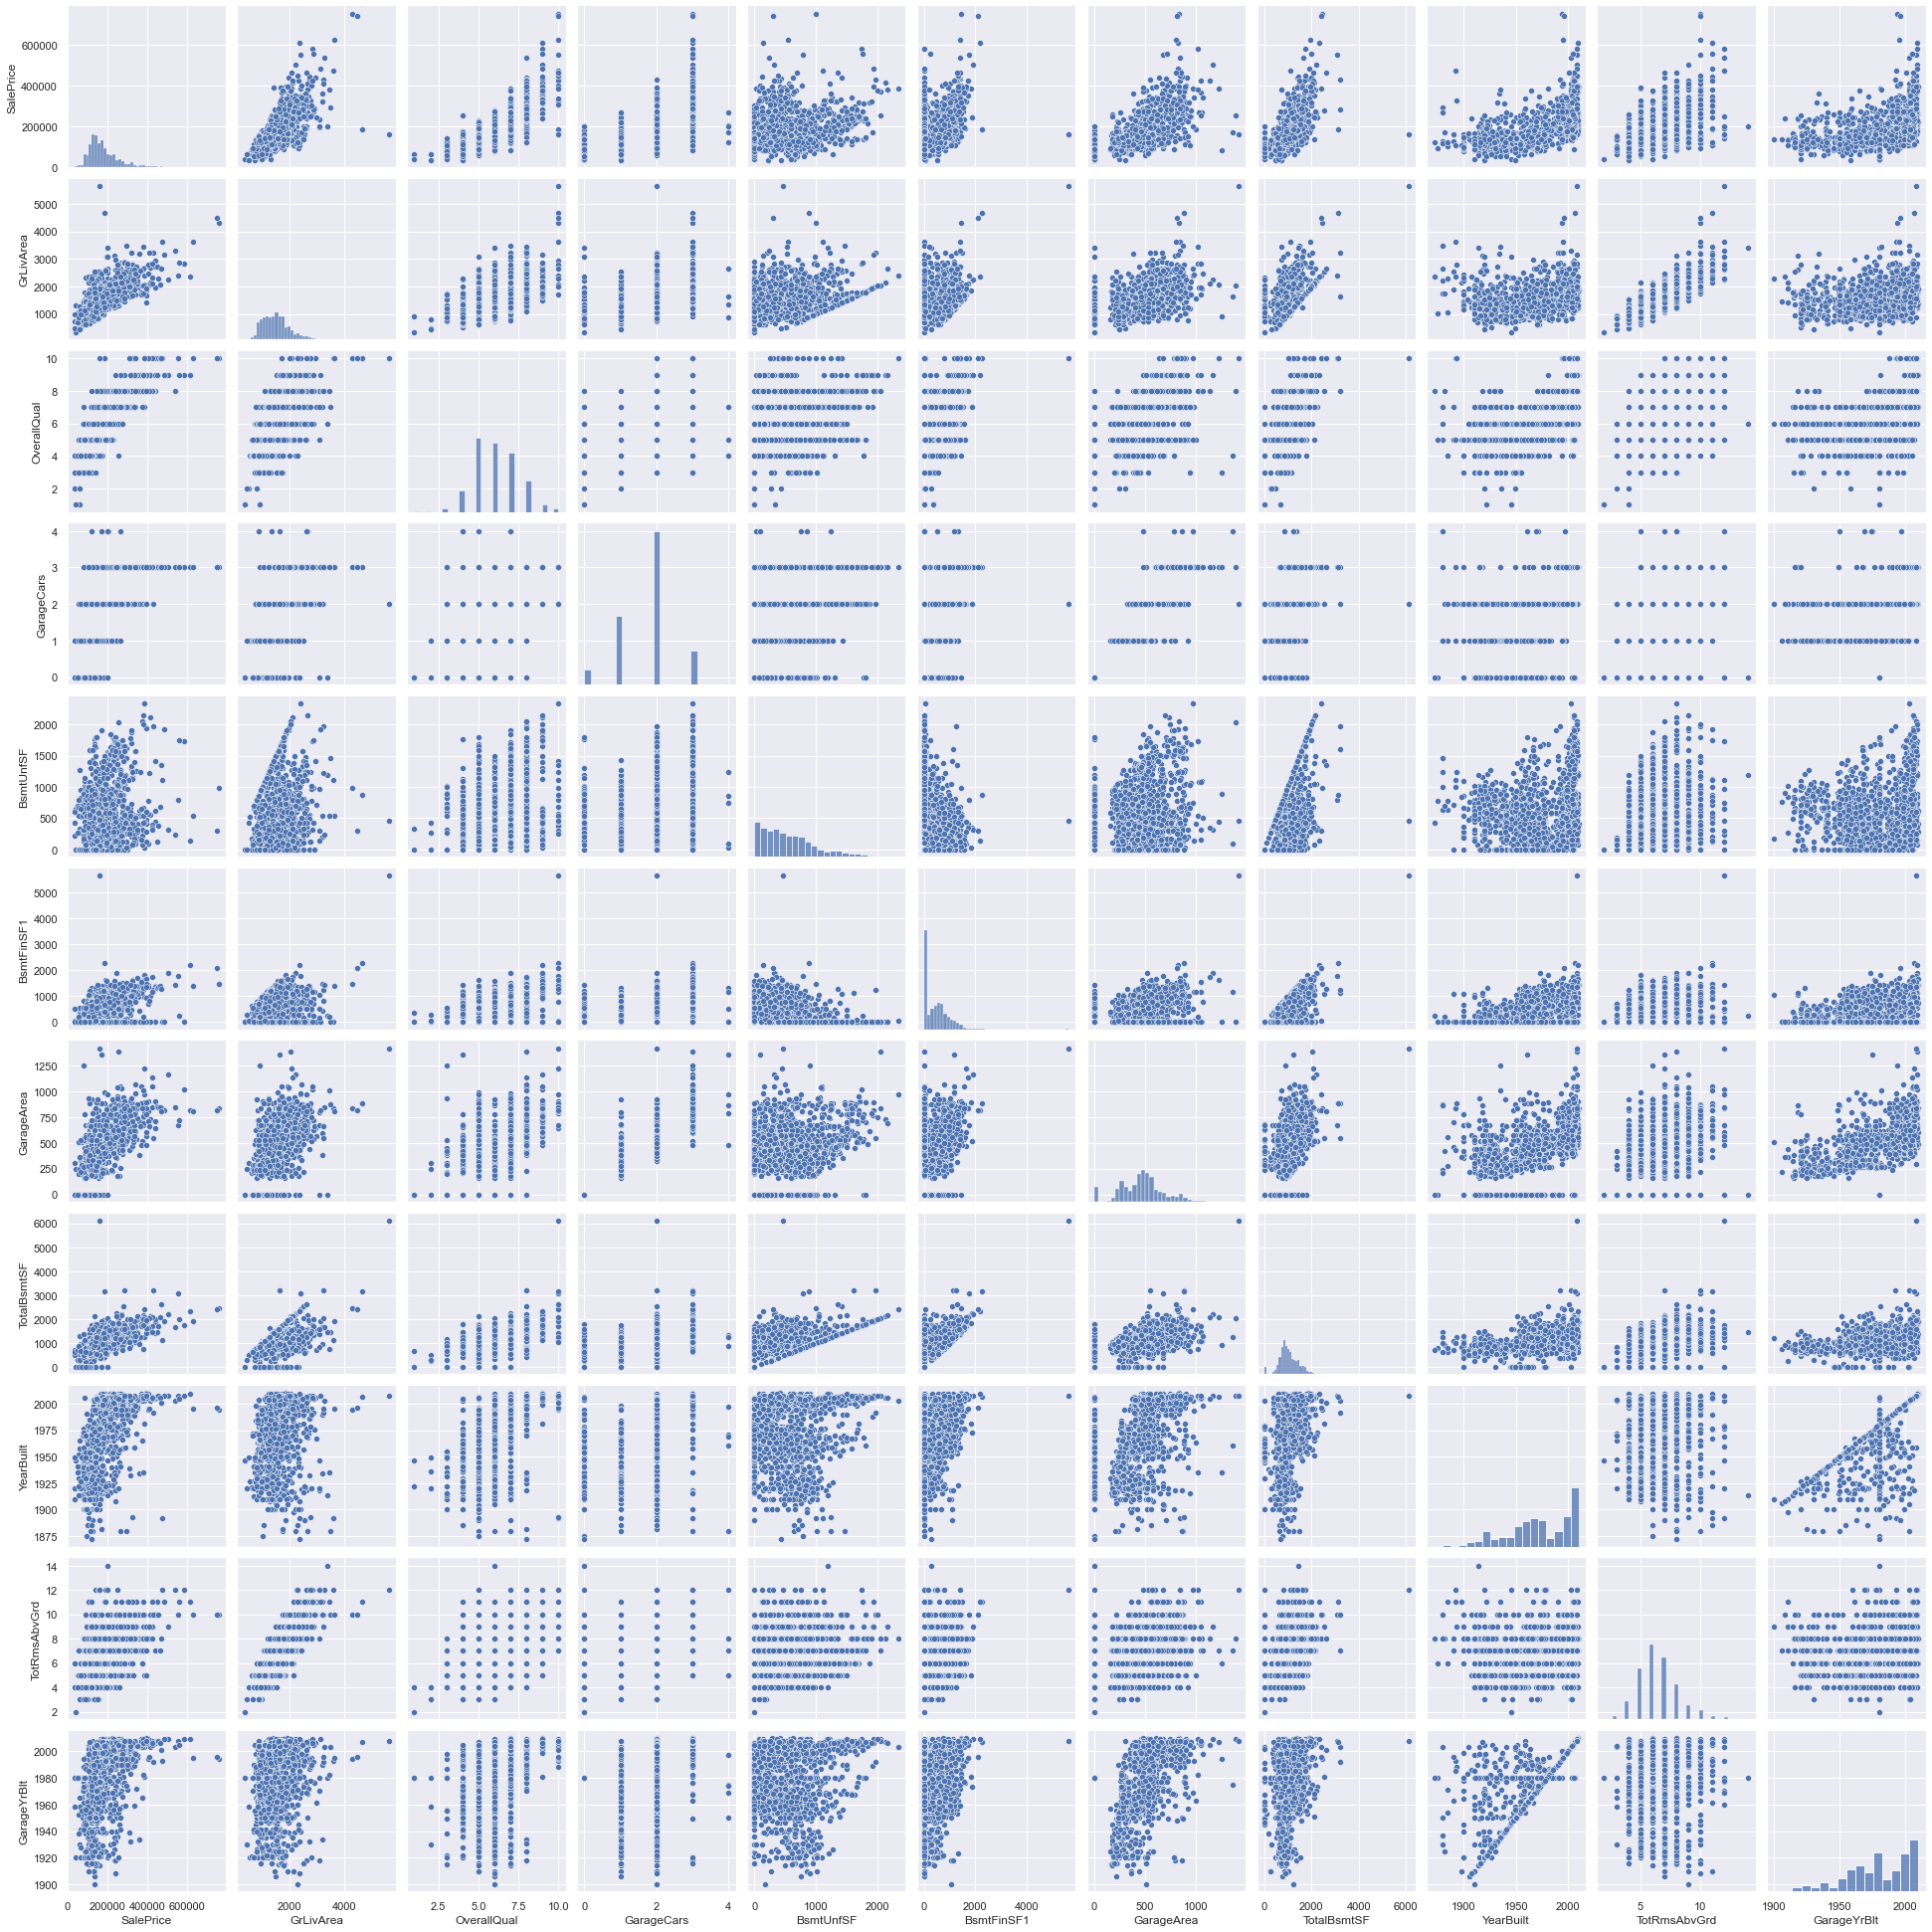

In [40]:
# Lets create pairplot to understand each one better
# sns.set()
cols = ['SalePrice', 'GrLivArea', 'OverallQual', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(housing_df[cols])
plt.show()